In [5]:
# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency 
from scipy.stats import ttest_ind
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('marketing_AB.csv')

In [7]:
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


# Ejercicio 1:

Supongamos que estamos realizando un experimento para determinar si un nuevo diseño de anuncio (test group "ad") tiene un impacto significativo en la tasa de conversión en comparación con el diseño de anuncio anterior (test group "psa").

- Preparación de los datos: Asegúrate de que los datos estén limpios y listos para el análisis. Esto incluye la eliminación de datos faltantes y la verificación de la coherencia de los datos.

In [8]:
df.shape

(588101, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [10]:
df['most ads hour'].unique()

array([20, 22, 18, 10, 14, 13, 19, 11, 12, 16, 21,  3, 23,  4,  8,  0,  2,
       15,  1,  6, 17,  7,  9,  5])

- Definición de las hipótesis: Plantea una hipótesis nula (H0) y una hipótesis alternativa (H1) para el experimento (en este caso os las damos definidas):

    Hipótesis nula (H0): No hay diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".
    
    Hipótesis alternativa (H1): Existe una diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

- Cálculo de la tasa de conversión: Calcula la tasa de conversión para cada grupo:

Para el grupo "ad", la tasa de conversión es el número de usuarios convertidos dividido por el número total de usuarios en ese grupo.

Para el grupo "psa", realiza el mismo cálculo.

In [11]:
total_ad = (df['test group'] == 'ad').sum()
total_ad

564577

In [12]:
total_psa = (df['test group'] == 'psa').sum()
total_psa

23524

In [30]:
convertidos_ad = df['converted'][(df['test group'] == 'ad') & (df['converted'] == True)].count()

In [14]:
convertidos_psa = df['converted'][(df['test group'] == 'psa') & (df['converted'] == True)].count()
convertidos_psa

420

In [15]:
tasa_conversion_ad = convertidos_ad / total_ad
tasa_conversion_ad

0.025546559636683747

In [16]:
tasa_conversion_psa = convertidos_psa / total_psa
tasa_conversion_psa

0.01785410644448223

In [17]:
#tasa_conversion_psa = df[df['test group'] == 'psa']['converted'].mean()

In [18]:
#df[df['test group'] == 'ad']['converted'].mean()

- Prueba de hipótesis: Utiliza una prueba estadística, como la prueba t de Student o la prueba chi-cuadrado, para comparar las tasas de conversión entre los grupos "ad" y "psa".

In [19]:
contingency_table = pd.crosstab(df ['test group'], df ['converted'])
chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
print (f"Prueba de Chi-cuadrado - p-valor: { p_chi2 }")

Prueba de Chi-cuadrado - p-valor: 1.9989623063390075e-13


- Análisis de resultados:

Si el valor p es menor que un umbral predefinido (por ejemplo, 0.05), rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en las tasas de conversión entre los grupos.

Si el valor p es mayor que el umbral, no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay una diferencia significativa.

Rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en las tasas de conversión entre los grupos. 

Conclusiones y recomendaciones: Basándote en los resultados de la prueba de hipótesis, llega a una conclusión sobre si el nuevo diseño de anuncio es más efectivo en la conversión de usuarios que el diseño anterior. Si es así, puedes hacer recomendaciones basadas en estos hallazgos.

Dado los resultados, rechazamos la hipótesis nula y concluimos que existe una diferencia significativa entre los grupos de prueba. El nuevo diseño 'ad' tiene un impacto significativo en la tasa de conversiónn, por lo tanto, recomendamos que lo aplique. 

# Ejercicio 2:

En este caso, vamos a realizar un experimento para comparar la cantidad promedio de anuncios vistos por los usuarios en los grupos "ad" y "psa" y determinar si hay una diferencia significativa entre ellos.

Objetivo del experimento: Comparar la cantidad promedio de anuncios vistos por usuario entre los grupos de prueba "ad" y "psa" para determinar si el tipo de anuncio afecta la cantidad de anuncios que los usuarios ven.

Preparación de los datos: Asegúrate de que los datos estén limpios y listos para el análisis. Esto incluye la eliminación de datos faltantes y la verificación de la coherencia de los datos

Hipótesis: Plantea una hipótesis nula (H0) y una hipótesis alternativa (H1) para el experimento. En este caso, las deberéis plantear vosotras

- HIPÓTESIS NULA (H0): No hay diferencia significativa entre ambos grupos
- HIPÓTESIS ALTERNATIVA (H1): Si hay diferencia significativa entre ambos grupos

(antiguo anunción = psa, nuevo anuncio = ad)

- Prueba de hipótesis: Utiliza una prueba estadística, como la prueba t de Student, para comparar la cantidad promedio de anuncios vistos por usuario entre los grupos "ad" y "psa". Esto te permitirá determinar si hay una diferencia significativa entre los dos grupos.

In [24]:
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [28]:

df_promedio_grupos = df.groupby('test group')['total ads'].mean().reset_index().round(2)
df_promedio_grupos

,test group,total ads
0,ad,24.82
1,psa,24.76


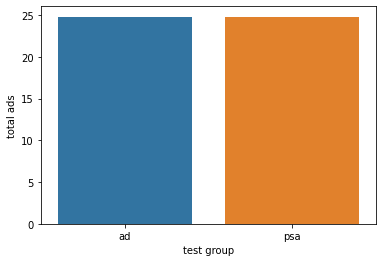

In [29]:
sns.barplot(x = 'test group', y = 'total ads', data=df_promedio_grupos );

In [34]:
grupo_control = df_promedio_grupos[df_promedio_grupos['test group'] == 'psa']['total ads']
grupo_alternativo = df_promedio_grupos[df_promedio_grupos['test group'] == 'ad']['total ads']


t_stat, p_value = ttest_ind(grupo_control, grupo_alternativo)

if p_value < 0.05:
    print("Hay una diferencia significativa.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          """)
else:
    print("No hay evidencia de una diferencia significativa .")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas.
          Por lo tanto, aunque en la gráfica veamos que hay diferencias entre el grupo "test" y el grupo "control",
          el análisis estadístico nos sugiera que estas diferencias no son significativas.
          """)


No hay evidencia de una diferencia significativa .

 ---------- 


          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas.
          Por lo tanto, aunque en la gráfica veamos que hay diferencias entre el grupo "test" y el grupo "control",
          el análisis estadístico nos sugiera que estas diferencias no son significativas.
          


Las pruebas indican que no hay una diferencia significativa entre las tasas de promedio de visualización de los dos grupos.